# Waze Project

### Regression Analysis

We will build a binomial logistic regression to predict the probability of the outcome.

In [1]:
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Packages for Logistic Regression & Confusion Matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\waze_dataset.csv')

### **EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.

In [3]:
# Shape of the data
print('Shape of Data:', df.shape)

# Basic information of the dataset
df.info()

Shape of Data: (14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 

There are 700 missing values for the column label.

In [4]:
# Display few rows of the data
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
# Drop ID column
df = df.drop(columns=['ID'])
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [6]:
# Check the class balance for the outcome variable label
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

In [7]:
# Display basic statistics using describe()
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


driven_km_drives, duration_minutes_drives, drives, total_sessions, total_navigations_fav1, total_navigations_fav2, and sessions seem to have higher max values than the normal. A deeper look should be taken to check whether they are potential outliers or correct values.

### **Feature Engineering**

#### **`km_per_driving_day`**

You know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

In [8]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# Display descriptive stats
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column.

In [9]:
# Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

# Display descriptive stats
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives and drove on 15+ days in the last month.

In [10]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [11]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### Handling Outliers

In [12]:
# Drop rows with missing data in `label` column
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
 12  km_per_driving_day       14299 non-null  float64
 13  professional_driver      14299 non-null  int32  
dtypes: float64(4), int32(1

In [13]:
# Replace outliers
def replace_outlier(col):
    '''
    Helper function to replace outliers with 95th percentile value
    Arguments:
        col - column to replace the outliers
    '''
    threshold = df[col].quantile(0.95)
    df.loc[df[col] > threshold, col] = threshold
    
cols = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 
        'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']

for col in cols:
    replace_outlier(col)

In [14]:
# Display descriptive stats
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

In [15]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='retained', 0, 1)

### Check the assumptions of Logistic Regression

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

#### **Collinearity**

Check the correlation among predictor variables.

In [16]:
# Generate a correlation matrix
correlation = df.corr(method='pearson')
correlation

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


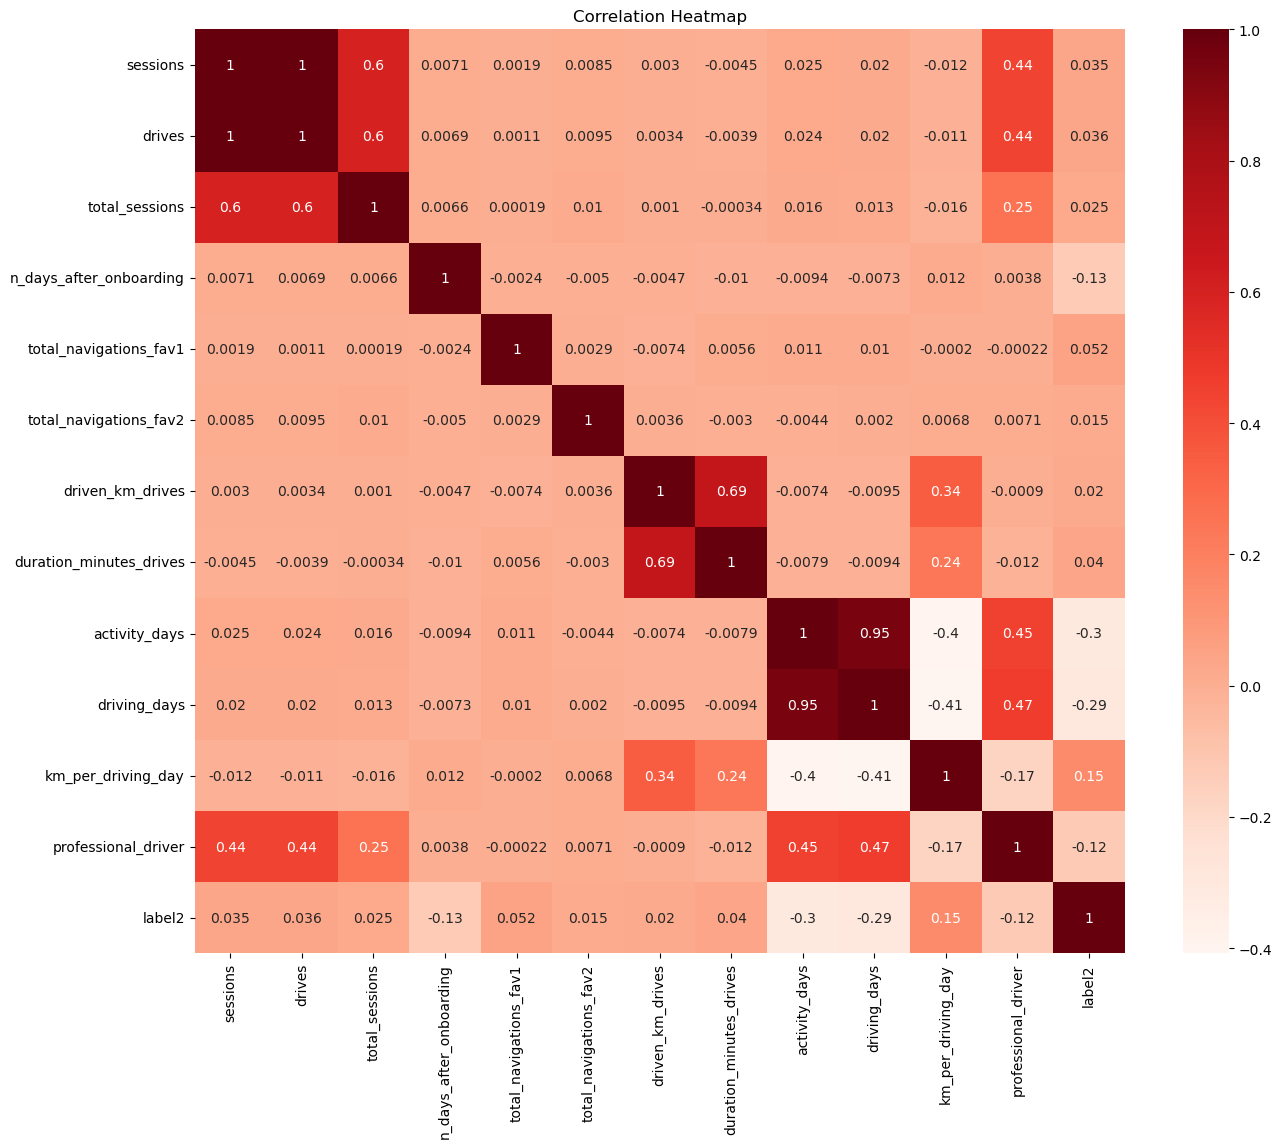

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(correlation,
           annot= True,
            cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

sessions - drives, activity_days - driving_days are highly correlated.

In [21]:
# Create new encoded variable for device type
df['device2'] = pd.get_dummies(df['device'], drop_first=True)

### **Model building**

In [22]:
# Isolate predictor variables
X = df.drop(columns=['label', 'label2', 'device', 'sessions', 'driving_days'])

In [23]:
# Isolate target variable
y = df[['label2']]

In [24]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
1245,200,455.439492,504,0,113,2707.906201,1090.476086,30,100.292822,1,1
7972,137,282.858310,3382,0,124,7113.176056,2005.715481,1,0.000000,0,1
4665,2,73.077779,2133,88,13,4089.069058,2737.176219,30,170.377877,0,1
11921,123,325.427459,3017,167,7,1457.283362,451.848000,13,132.480306,0,0
803,39,455.439492,78,126,51,4772.509343,2837.036812,28,238.625467,0,1


In [26]:
clf = LogisticRegression(penalty='none', max_iter=500).fit(X_train, y_train)

C:\Users\mukhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mukhe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# coefficients
pd.DataFrame(clf.coef_, columns=X_train.columns)

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
0,0.00171,0.000383,-0.000403,0.001305,0.000647,-0.000021,0.000106,-0.104183,0.000031,-0.001515,-0.00102


In [28]:
# model's intercept
clf.intercept_

array([-0.00169272])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [29]:
# Get the predicted probabilities of the training data
y_proba = clf.predict_proba(X_train)
y_proba

array([[0.93600925, 0.06399075],
       [0.72838689, 0.27161311],
       [0.97405629, 0.02594371],
       ...,
       [0.92006978, 0.07993022],
       [0.85344046, 0.14655954],
       [0.93773207, 0.06226793]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. The formula for calculating log-odds, where _p_ is the probability of response:

<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

In [31]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(p[1]/p[0]) for p in y_proba]

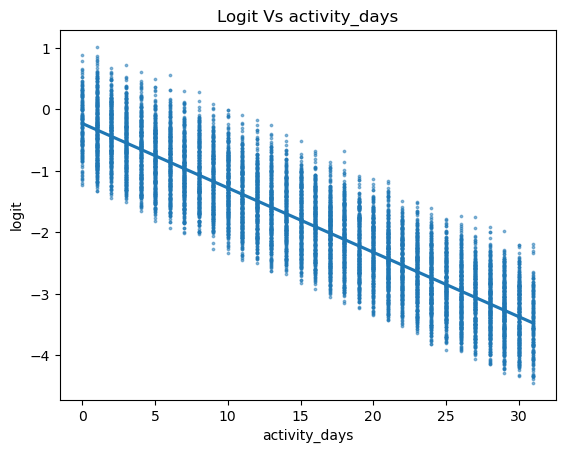

In [32]:
# Plot regplot of `activity_days` log-odds
sns.regplot(data=logit_data, x='activity_days', y='logit', scatter_kws={'s':3, 'alpha':0.5})
plt.title('Logit Vs activity_days')
plt.show()

### **Results and evaluation**

In [33]:
# Generate predictions on X_test
y_pred = clf.predict(X_test)

In [34]:
# Score the model (accuracy) on the test data
clf.score(X_test, y_test)

0.8258741258741259

In [35]:
# Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

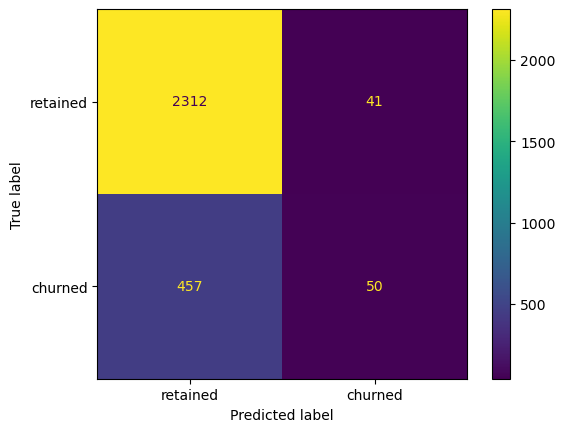

In [36]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'churned'])
disp.plot()
plt.show()

In [37]:
# Calculate precision manually
precision = cm[1,1]/(cm[0,1]+cm[1,1])
precision

0.5494505494505495

In [38]:
# Calculate recall manually
recall = cm[1,1]/(cm[1,0]+cm[1,1])
recall

0.09861932938856016

In [39]:
# Create a classification report
print(classification_report(y_test, y_pred, target_names=['retained', 'churned']))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2353
     churned       0.55      0.10      0.17       507

    accuracy                           0.83      2860
   macro avg       0.69      0.54      0.53      2860
weighted avg       0.78      0.83      0.77      2860



The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **Feature Importance**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [40]:
# Create a list of (column_name, coefficient) tuples
feature_imp = [(X_train.columns[i], clf.coef_[0][i]) for i in range(len(clf.coef_[0]))]

# OR
# feature_imp = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
feature_imp = sorted(feature_imp, key=lambda x: x[1], reverse=True)
feature_imp

[('drives', 0.0017097692196586273),
 ('total_navigations_fav1', 0.0013045924289872624),
 ('total_navigations_fav2', 0.0006474211330645612),
 ('total_sessions', 0.0003825227491800571),
 ('duration_minutes_drives', 0.00010573347797675683),
 ('km_per_driving_day', 3.080837606719074e-05),
 ('driven_km_drives', -2.1372928029461002e-05),
 ('n_days_after_onboarding', -0.0004028143969099109),
 ('device2', -0.0010201243829549168),
 ('professional_driver', -0.0015146951256247254),
 ('activity_days', -0.10418276501997623)]

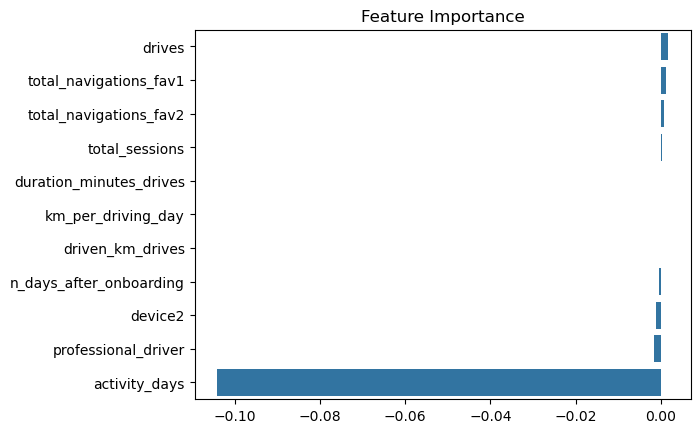

In [41]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature_imp],
            y=[y[0] for y in feature_imp])
plt.title('Feature Importance')
plt.show()

### **Conclusion**

* activity_days is the most influenced variable in the model's prediction. 1 day increase in activity_days will decrease the odds of user churned by -0.14 times. This is not a surprising element.<br>
* I expected total_sessions, km_per_driving_day, driven_km_drives could be more influencing than they were.<br>
* We need more granular data and the model needs extensive feature engineering to add more features that could better contribute to the prediction.<br>
* In-depth features related to driver like geography, time driven, any affiliations to ride apps etc could help in improving the model.